In [ ]:
'''dahyun+darwin = dahwin'''

'dahyun+darwin = dahwin'

# Lets explore pytorch end to end


*   DO questions : https://github.com/mrdbourke/pytorch-deep-learning/discussions
*  Main Notebook: https://github.com/mrdbourke/pytorch-deep-learning/blob/main/01_pytorch_workflow.ipynb




# What were covering ⁉=



*   data (prepare and load)
*   build model


*   fitting the model to data (traning)
*   making predictions and evaluting a model 


*   saving and loading amodel
*   putting it all together







In [ ]:
import torch
from torch import nn # nn contains all of pytorch's bulding blocks for neural networks
import matplotlib.pyplot as plt
torch.__version__

'1.13.1+cu116'

# Data (preparing and loading)
data can be almost anything .. in maching learning.


*   Excel speadsheet

*   Images of any kind

*   Videos (Youtube has lots of data...)
*   Audio like songs or podcasts


*   DNA


*   Text

Machine learning is a game of two parts


1.   Get data into a numerical repressentation.
2.   Build a model to learn patterns in that numerical repressentation.

To showcase this , lets's create some *kown* data using the linear regression formula

we'll use a linear regression  formula to make a straght line whith known perameters.



In [ ]:
# create *know* parameters
weight = 0.7 
bias = 0.3

# create
start = 0
end = 1
step = 0.02
x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * x+bias
x[:10],y[:10],len(x),len(y)

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]), 50, 50)

# Train and test split

In [ ]:
# Creat a train /test split
train_split = int(0.8*len(x))
x_train , y_train = x[:train_split],y[:train_split]
x_test , y_test = x[train_split:],y[train_split:]
len(x_train), len(y_train) , len(x_test),len(y_test)


(40, 40, 10, 10)

# Visualize


In [ ]:
def plot_predictions(train_data=x_train,
                     train_labels=y_train,
                     test_data= x_test,
                     test_labels=y_test,
                     predictions=None):

    plt.figure(figsize=(10,7))
    plt.scatter(train_data, train_labels, c='b', s=4, label='Training data')
    plt.scatter(test_data, test_labels, c='r', s=4, label='Testing data')

    if predictions is not None:
        plt.scatter(test_data, predictions, c='b', s=4, label='Predictions')

    plt.legend(prop={'size': 14})
    plt.show()


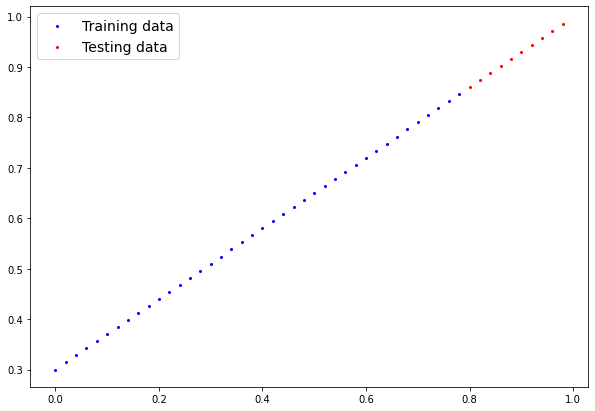

In [ ]:
plot_predictions()

# Build the Model with pytorch





1.   Start woth ramdom, values (weight&bias)
2.   Look at training data and adjust the random values to better
represent (or get closer to ) the ideal values ( the weight & bias 

How does it do so?

Throught two main algorithms


1.   Gradient descent : https://youtu.be/IHZwWFHWa-w
2.   Backpropagration : 





In [ ]:
from torch import nn

In [ ]:

# Create a Linear Regression model class
class LinearRegressionModel(nn.Module): # <- almost everything in PyTorch is a nn.Module (think of this as neural network lego blocks)
    def __init__(self):
        super().__init__() 
        self.weights = nn.Parameter(torch.randn(1, # <- start with random weights (this will get adjusted as the model learns)
                                                dtype=torch.float), # <- PyTorch loves float32 by default
                                   requires_grad=True) # <- can we update this value with gradient descent?)

        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True) # <- can we update this value with gradient descent?))

    # Forward defines the computation in the model
    def forward(self, x: torch.Tensor) -> torch.Tensor: # <- "x" is the input data (e.g. training/testing features)
        return self.weights * x + self.bias # <- this is the linear regression formula (y = m*x + b) 

#PyTorch model building essentials 😉❤😎 Dahwin
Pytorch has four essential modeules you can use to create almost any kind of neaural network you can imagine.
they are torch.nn , torch.optim, torch.utils.data.Dataset and torch.utils.data.DataLoader. For now we'll  foucs on the first two and get to the other two later (trhough you may be able to guess whta they do).



*   torch.nn : Contains all of the building blocks for computational graphs (essentially a series of computations executed in a particular way).
*  torch.nn.Parameter : Stores tensos that can be used with nn.Module . if requires_grad = True gradients (used for updating mdoel parametes via gradient desecent are calculated automatically . this is often reffered to as 'autograd'.


*   Torch.nn.Module THe base clasds for all neural network modules , all the building blocks for neural networks are subcalss. if you're building a neural network in pytorch your models should subclass nn.Module.Requires a forward() mehtod be implemented.

*   torch.optime Contains various optimization algorithms ( these tell the model parameters stored in nn.Parameter how to best chage to improve gradient descent and in furn reduce the loss

*   def forward() All nn.Module subclasses require a forward() method, this defines the computation that will take place on the data passed to the particular nn.Module (e.g. the linear regression formula above






# Checking the contents of our pytorch model 
Now we've created a model , lets see what's indside''
So we can check our model parameters or wht's inside our model


In [ ]:
# Create a random seed 
torch.manual_seed(42)
# Create an instance of the model this is a subclass of nn.Module
model_ = LinearRegressionModel()
list(model_.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

# Predict our model with torch.inference_model()

In [ ]:
y_pr = model_(x_test)
y_pr

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]], grad_fn=<AddBackward0>)

In [ ]:

with torch.inference_mode():
  y_pree = model_(x_test)

y_pree

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

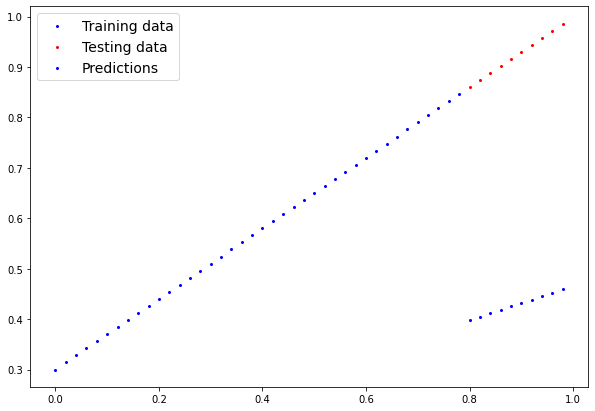

In [ ]:
plot_predictions(predictions=y_pree)

In [ ]:
y_test

tensor([[0.8600],
        [0.8740],
        [0.8880],
        [0.9020],
        [0.9160],
        [0.9300],
        [0.9440],
        [0.9580],
        [0.9720],
        [0.9860]])

# Train Model

The whole idea of traning  is for a model to move from some unkown parameters (these may be random) to some known parameters.
Or in ohter words from a por representation of the data to a better representation of the data.

One way to measure how poor or how wrong your models predictions are is to use a loss function.

*Note: Loss fuction may also be called cont fuction or criterion different areas. For our case, we're going to refer to it as a loss function.

* **Loss function:** A fuction to measure how wrong your model's predictions are to the ideal outputs,lower is better
* **Optimizer**  Takes into account the loss of a model and adjusts the model's parameters (e.g. weight & bias)

Add specially for Pytorch we need:


*   A training loop
*   A testing loop



In [ ]:
list(model_.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
# Setup a loss fuction
loss_fn = nn.L1Loss()
# Setup a optimizer
optimizer = torch.optim.SGD(params=model_.parameters(),
                            lr=0.01) # lr = learning rate

# Q Which loss fuction and opotimezer should I use?
A: This will be promblem specific. But with exprerience you'll get an ideo of what works and what doesn't with your particular problem set.
For example for a regression problem (like ours) a loss luction of nn.L1Loss() and an opetimizer like torch.optim.SDG() will suffice.
but for cassification problem fike classifing whether a photo is of a dog or fox you'll likey want to use a loss fuction of nn.BCELoss() (binary cross emtropy loss)



# Build a traning and testing loop with pytorch
A comle of things we need in a traning loop:
0: Loop throgh the data
1: Forward pass (this involves data moving through our model's forward()
fuctions) to make predictions on data - also callled forward propagation
2: Calculate the loss (compare forward pass predictions to ground truth labes)
3: Optimizer zero grad
4: Loss backward - move backwors through the network to calculate the gradients of each of the parameters of our model with prespect to the loss         (**backpropagration**)
5: Optimizer step -use the optimizer to adjust our model's parameters to try and improve the loss (**gredient decent**)

In [ ]:
list(model_.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True), Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [ ]:
torch.manual_seed(42)
# AN epoch is one loop through the data... (this is a  hyperparameters because we've set it ourselves)
# Set the number of epochs (how many times the model will pass over the training data)
epochs= 200
# Track different values
epochs_count = []
loss_values = []
test_loss_values = [] 
# o. Loop through the data
for epoch in range(epochs):
  model_.train() # train mode in Pytorch sets all parameters that require gredents to require gredents
  # 1. Forward pass on train data using the forward() method inside
  y_pre = model_(x_train)
  # 2. Calculate the loss (how different are our models predictions to the ground truth)
  loss = loss_fn(y_pre,y_train)
  # print(f'lose:{loss}')
  # 3. Optimizer zero grad
  optimizer.zero_grad()
  # 4. Perform backpropagation on the loss to the parameters of the model
  loss.backward()
  # 5. Set the optimiiiiizer (perform gradient decents)
  optimizer.step() # by default how the optimizer changes will acculumate through the loop so .. we have to zeor them above in step 3 for the next iteration of the loop.
  ## testing
   # Put the model in evaluation mode
  model_.eval() # turns off different settings in the model not needed for evaluation/testing
  with torch.inference_mode():
    # 1. Do the forward pass
    test_pre = model_(x_test)
    # 2. Calculate the loss
    test_loss = loss_fn(test_pre,y_test)
    # print out wht's happening
  if epoch % 10 ==0:
     epochs_count.append(epoch)
     loss_values.append(loss)
     test_loss_values.append(test_loss)
     print(f"Epoch:{epoch} . Loss:{loss} . Test loss: {test_loss}\n")
     # print out model state_dict()
     print(model_.state_dict())

Epoch:0 . Loss:0.31288138031959534 . Test loss: 0.48106518387794495

OrderedDict([('weights', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch:10 . Loss:0.1976713240146637 . Test loss: 0.3463551998138428

OrderedDict([('weights', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch:20 . Loss:0.08908725529909134 . Test loss: 0.21729660034179688

OrderedDict([('weights', tensor([0.4184])), ('bias', tensor([0.3333]))])
Epoch:30 . Loss:0.053148526698350906 . Test loss: 0.14464017748832703

OrderedDict([('weights', tensor([0.4512])), ('bias', tensor([0.3768]))])
Epoch:40 . Loss:0.04543796554207802 . Test loss: 0.11360953003168106

OrderedDict([('weights', tensor([0.4748])), ('bias', tensor([0.3868]))])
Epoch:50 . Loss:0.04167863354086876 . Test loss: 0.09919948130846024

OrderedDict([('weights', tensor([0.4938])), ('bias', tensor([0.3843]))])
Epoch:60 . Loss:0.03818932920694351 . Test loss: 0.08886633068323135

OrderedDict([('weights', tensor([0.5116])), ('bias', tensor([0.3788]))])
E

In [ ]:
model_.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
with torch.inference_mode():
  y_pre_n = model_(x_test)
y_pre_n

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
epochs_count,loss_values,test_loss_values 

([0,
  10,
  20,
  30,
  40,
  50,
  60,
  70,
  80,
  90,
  100,
  110,
  120,
  130,
  140,
  150,
  160,
  170,
  180,
  190],
 [tensor(0.3129, grad_fn=<MeanBackward0>),
  tensor(0.1977, grad_fn=<MeanBackward0>),
  tensor(0.0891, grad_fn=<MeanBackward0>),
  tensor(0.0531, grad_fn=<MeanBackward0>),
  tensor(0.0454, grad_fn=<MeanBackward0>),
  tensor(0.0417, grad_fn=<MeanBackward0>),
  tensor(0.0382, grad_fn=<MeanBackward0>),
  tensor(0.0348, grad_fn=<MeanBackward0>),
  tensor(0.0313, grad_fn=<MeanBackward0>),
  tensor(0.0279, grad_fn=<MeanBackward0>),
  tensor(0.0245, grad_fn=<MeanBackward0>),
  tensor(0.0210, grad_fn=<MeanBackward0>),
  tensor(0.0176, grad_fn=<MeanBackward0>),
  tensor(0.0142, grad_fn=<MeanBackward0>),
  tensor(0.0107, grad_fn=<MeanBackward0>),
  tensor(0.0073, grad_fn=<MeanBackward0>),
  tensor(0.0039, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>),
  tensor(0.0089, grad_fn=<MeanBackward0>)],
 [tensor(

In [ ]:
import numpy as np
np.array(torch.tensor(loss_values).cpu().numpy()) , test_loss_values

(array([0.31288138, 0.19767132, 0.08908726, 0.05314853, 0.04543797,
        0.04167863, 0.03818933, 0.0347609 , 0.03132383, 0.0278874 ,
        0.02445896, 0.02102021, 0.01758547, 0.01415539, 0.01071659,
        0.00728353, 0.00385178, 0.00893248, 0.00893248, 0.00893248],
       dtype=float32),
 [tensor(0.4811),
  tensor(0.3464),
  tensor(0.2173),
  tensor(0.1446),
  tensor(0.1136),
  tensor(0.0992),
  tensor(0.0889),
  tensor(0.0806),
  tensor(0.0723),
  tensor(0.0647),
  tensor(0.0565),
  tensor(0.0482),
  tensor(0.0406),
  tensor(0.0323),
  tensor(0.0241),
  tensor(0.0165),
  tensor(0.0082),
  tensor(0.0050),
  tensor(0.0050),
  tensor(0.0050)])

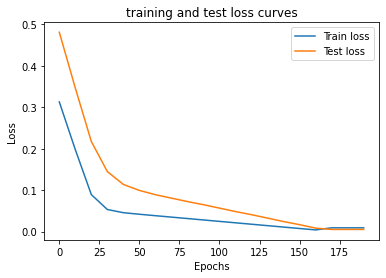

In [ ]:
# Plot the loss curves
plt.plot(epochs_count,np.array(torch.tensor(loss_values).numpy()),label= "Train loss")
plt.plot(epochs_count,test_loss_values,label='Test loss')
plt.title('training and test loss curves')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend()

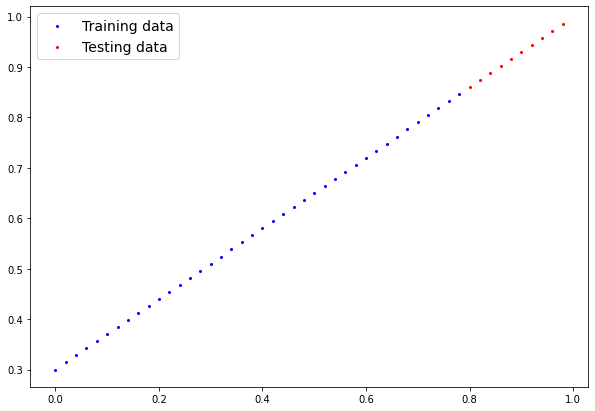

In [ ]:
plot_predictions()

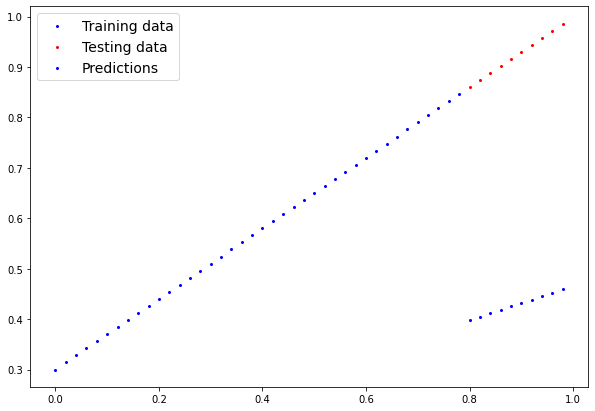

In [ ]:
plot_predictions(predictions=y_pree)

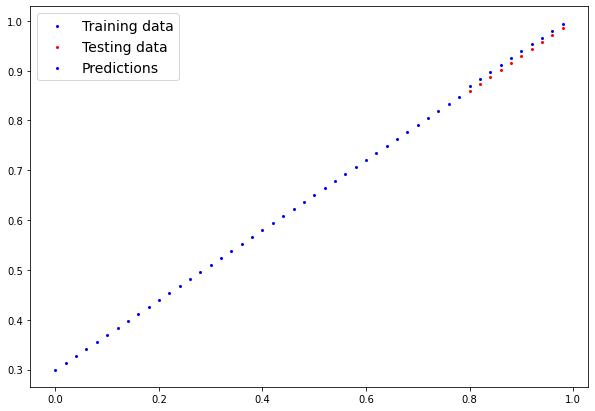

In [ ]:
plot_predictions(predictions=y_pre_n)

# Saving a model in PyTorch
There are three main mehtods you should about for saving and loading models in Pytorch:
1. torch.save() - allows you save a pytorch object in python's pickle pormat
2. torch.load() - allows you load a saved pytorch object
3. torch.nn.Module.load_state_dict() - this allows to load a model's saved state dictionary


# My First deep learning model with dahyun+darwin = dahwin

In [ ]:
# saving our pytorch model
from pathlib import Path
# 1. create models directory
model_path = Path('models')
model_path.mkdir(parents=True,exist_ok=True)
# 2. Create model save path
model_name = 'dahwin.pt'
model_save_path = model_path /model_name
# 3. save the model state dict
print(f'Saving model to :{model_save_path}')
torch.save(obj=model_.state_dict(),f=model_save_path)

Saving model to :models/dahwin.pt


## Load Model

In [ ]:
ls -1 models

dahwin.pt


In [ ]:
# to lead in a saved state_dict we have to instantiate a new instance of our model class
loaded_model_ = LinearRegressionModel()
# Load the saved state_dict of model_ (this will update thenew instance with updated parameter)
loaded_model_.load_state_dict(torch.load(f=model_save_path))

<All keys matched successfully>

In [ ]:
model_.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

In [ ]:
# make some predicteons with our loaded model
loaded_model_.eval()
with torch.inference_mode():
  loaded_model_pre = loaded_model_(x_test)
loaded_model_pre

tensor([[0.8685],
        [0.8825],
        [0.8965],
        [0.9105],
        [0.9245],
        [0.9384],
        [0.9524],
        [0.9664],
        [0.9804],
        [0.9944]])

In [ ]:
# compare laoded model pres with original lmodel prediction
y_pre_n == loaded_model_pre

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])

# 6 Putting it all together
Loet's go back through the stips above and see it all in one place

In [ ]:
import torch
import matplotlib.pyplot as plt
from torch import nn


# Create device -agnostic code.
This means if we've got access to a GPU , our code will use it (for potentially faster compuing)

if no GPU is available , the code will default to using CPU.


In [ ]:
# Setup device agnostic doe
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print(f"Using device:{device}")

Using device:cuda


# 6.1 Data

In [ ]:
# create some daa using the linea regression formual y = weight *x+bias
weight = 0.7
bias = 0.3
# create range values
start = 0
end = 1
step = 0.02
# create x and y (features and labels)
x = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight*x+bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [ ]:
# splite data
train_split = int(0.8*len(x))

x_train ,y_train = x[:train_split],y[:train_split]
x_test,y_test= x[train_split:],y[train_split:]
len(x_train),len(y_train),len(x_test),len(y_test)

(40, 40, 10, 10)

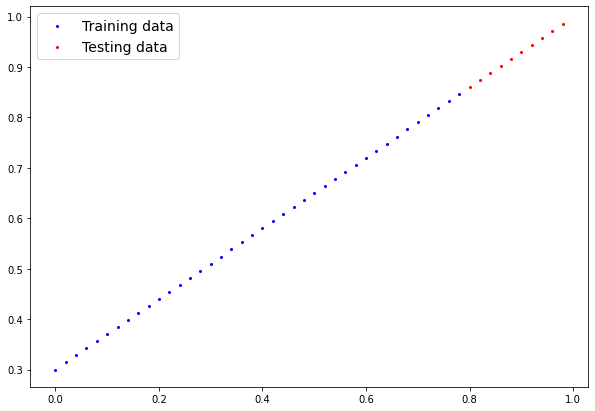

In [ ]:
# plot the data 
plot_predictions(x_train,y_train,x_test,y_test)

# 6.2 Building a pytorch linear model

In [ ]:
# Subclass nn.Module to make our model
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        # Use nn.Linear() for creating the model parameters
        self.linear_layer = nn.Linear(in_features=1, 
                                      out_features=1)
    
    # Define the forward computation (input data x flows through nn.Linear())
    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)

# Set the manual seed when creating the model (this isn't always need but is used for demonstrative purposes, try commenting it out and seeing what happens)
torch.manual_seed(42)
model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
x_train[:5],y_train[:5]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800]]), tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560]], device='cuda:0'))

In [ ]:
#cheack  the current device
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
# set the mdoel the terget device 
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

# 6.3 Training
For training we need:


*   Loss fuction
*   Optimizer


*   Training loop
*   Testing loop





In [ ]:
#setup loss fuction
loss_fn = nn.L1Loss() # same as MAE
#setup our optimizer 
optimizer = torch.optim.SGD(params= model_1.parameters(),lr=0.01)

In [ ]:
# Let's write a training loop
torch.manual_seed(42)

epochs = 200
# put  data on the target device (device agnostic code)
x_train = x_train.to(device)
y_train = y_train.to(device)
x_test = x_test.to(device)
y_test = y_test.to(device)
for epoch in range(epochs):
  model_1.train()
  # 1. Forward pass
  y_pred = model_1(x_train)
  # 2. Calculate the loss
  loss = loss_fn(y_pred,y_train)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Performs backpropagration
  loss.backward()

  # 5. Optimizer step
  optimizer.step()
  ### testing
  model_1.eval()
  with torch.inference_mode():
    test_pre = model_1(x_test)
    test_loss = loss_fn(test_pre,y_test)
    # print
  if epoch % 10 ==0:
    print(f"Epoch:{epoch} . loss: {loss} . test_loss:{test_loss}\n")

Epoch:0 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:10 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:20 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:30 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:40 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:50 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:60 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:70 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:80 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:90 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:100 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:110 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:120 . loss: 0.0012645035749301314 . test_loss:0.013801801018416882

Epoch:130 . loss: 0.0012645035749301314 . test_lo

In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

# Making and evalusting predictions

In [ ]:
# Turn model into evaluation mode
model_1.eval()

# make prediction on the test data
with torch.inference_mode():
  y_pre = model_1(x_test)
y_pre

tensor([[0.8600],
        [0.8739],
        [0.8878],
        [0.9018],
        [0.9157],
        [0.9296],
        [0.9436],
        [0.9575],
        [0.9714],
        [0.9854]], device='cuda:0')

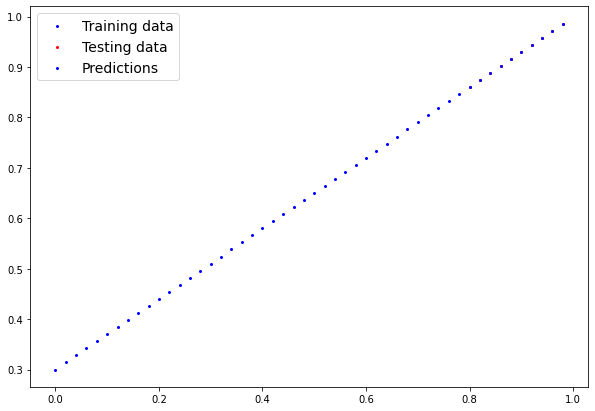

In [ ]:
plot_predictions(predictions=y_pre.cpu())

# Save model

In [ ]:
from pathlib import Path
model_path = Path('models')
model_name = 'dahwin0.pt'
model_save_path = model_path / model_name
print(f"saving:{model_save_path}")
torch.save(obj=model_1.state_dict(),f=model_save_path)

saving:models/dahwin0.pt


In [ ]:
loaded_model = LinearRegressionModelV2()
loaded_model.load_state_dict(torch.load(f=model_save_path))
loaded_model.to(device)

LinearRegressionModelV2(
  (linear_layer): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
loaded_model.eval()
with torch.inference_mode():
  loaded_model_pre = loaded_model(x_test)
loaded_model_pre == y_pre

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]], device='cuda:0')